# Project Breast Cancer Detection

Source:

Creator:

Dr. WIlliam H. Wolberg (physician)

University of Wisconsin Hospitals

Madison, Wisconsin, USA

Location:

UCI data repository

Kaggle data repository

Attribute Information:

Sample code number: id number
Clump Thickness: 1 - 10
Uniformity of Cell Size: 1 - 10
Uniformity of Cell Shape: 1 - 10
Marginal Adhesion: 1 - 10
Single Epithelial Cell Size: 1 - 10
Bare Nuclei: 1 - 10
Bland Chromatin: 1 - 10
Normal Nucleoli: 1 - 10
Mitoses: 1 - 10
Class: (2 for benign, 4 for malignant)
Malignant==> Cancerous

Benign==> Not Cancerous (Healthy)

Background

All of our bodies are composed of cells. The human body has about 100 trillion cells within it. And usually those cells behave in a certain way. However, occasionally, one of these 100 trillion cells, behave in a different way and keeps dividing and pushes the other cells around it out of the way. That cell stops observing the rules of the tissue within which it is located and begins to move out of its normal position and starts invading into the tissues around it and sometimes entering the bloodstream and becoming is called a metastasis.

In summary, as we grow older,throughout a lifetime, we go through this knid of situation where a particular kind of gene is mutated where the protein that it makes is abnormal and drives the cell to behave in a different way that we call cancer.

This is what Dr. WIlliam H. Wolberg was observing and put together this dataset.

Can we predict whether a cell is Malignant or Benign?

# Import Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# !pip install pyforest
# from pyforest import*
# lazy_imports()

# Importing Breast Cancer Data Set

In [2]:
data=pd.read_csv("B:/Mukesh Important/SAS Tableau/BreastCancer_Python/breastCancer.csv")

In [3]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data Pre-Processing

In [6]:
data.shape ## To check the dimension of the dataset

(699, 11)

# Benign==> Not Cancerous (Healthy) and 4-Malignant==> Cancerous
## There are 458 Benign and 241 Cancerous

In [7]:
data["class"].value_counts() 

2    458
4    241
Name: class, dtype: int64

In [9]:
## To see the variable type. We found that all the variables are integer except bare_nucleoli. 
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [13]:
## If we look at the data carefully so we will find that each variable is integer including bare_nucleoli.
## so we will have to analyze bare_nucleoli.

data['bare_nucleoli'].head(25) #let's inspect the 'bare_nucleoli' column

0      1
1     10
2      2
3      4
4      1
5     10
6     10
7      1
8      1
9      1
10     1
11     1
12     3
13     3
14     9
15     1
16     1
17     1
18    10
19     1
20    10
21     7
22     1
23     ?
24     1
Name: bare_nucleoli, dtype: object

# After analysing we found that bare_nucleoli has "?". This is the reason the type of the variable has changed to object


In [13]:
data['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [14]:
#checking the presence of '?' in the 'bare_nucleoli' column
data[data['bare_nucleoli']=='?'] 

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [19]:
# alternatively
data[data['bare_nucleoli']=='?'].sum() 

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

## Alternatively
Using the isdigit() function



In [20]:
## isdigit() function will True for any number present in the variable otherwise it will show false
digits_in_bare_nucleoli= pd.DataFrame(data.bare_nucleoli.str.isdigit())
digits_in_bare_nucleoli.head(24)

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [21]:
#df[digits_in_hp['horsepower'] == False] 
data[digits_in_bare_nucleoli['bare_nucleoli']== False]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


## Let us replace these missing values with NaN

In [22]:
df=data.replace('?', np.nan)

In [23]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [25]:
df = df.fillna(df.median())

In [26]:
df.head(25)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [27]:
df['bare_nucleoli'].head(25)

0      1
1     10
2      2
3      4
4      1
5     10
6     10
7      1
8      1
9      1
10     1
11     1
12     3
13     3
14     9
15     1
16     1
17     1
18    10
19     1
20    10
21     7
22     1
23     1
24     1
Name: bare_nucleoli, dtype: object

In [28]:
## "?" has been converted from median but the type of the variable is still object for bare_nucleoli. Lets change it.
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [29]:
df['bare_nucleoli']=df['bare_nucleoli'].astype('int64')

In [30]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

## The data set has not missing values for any variable so we are good to proceed for Exploratory Data Analysis

## Exploratory Data Analysis

In [31]:
## Dropping the index of the dataset
df.drop('id', axis=1, inplace=True)

In [32]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [33]:
## To see the statistics use describe()
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [34]:
## To see the statistics variable wise use describe().T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


## Univariate Data Analysis with one variable

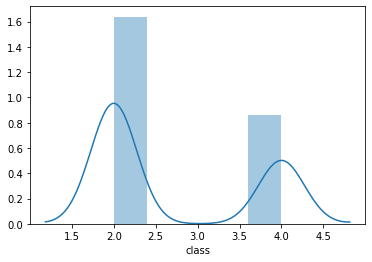

In [35]:
sns.distplot(df['class']) ## The data looks normal for class variable

## Multivariate Data Analysis

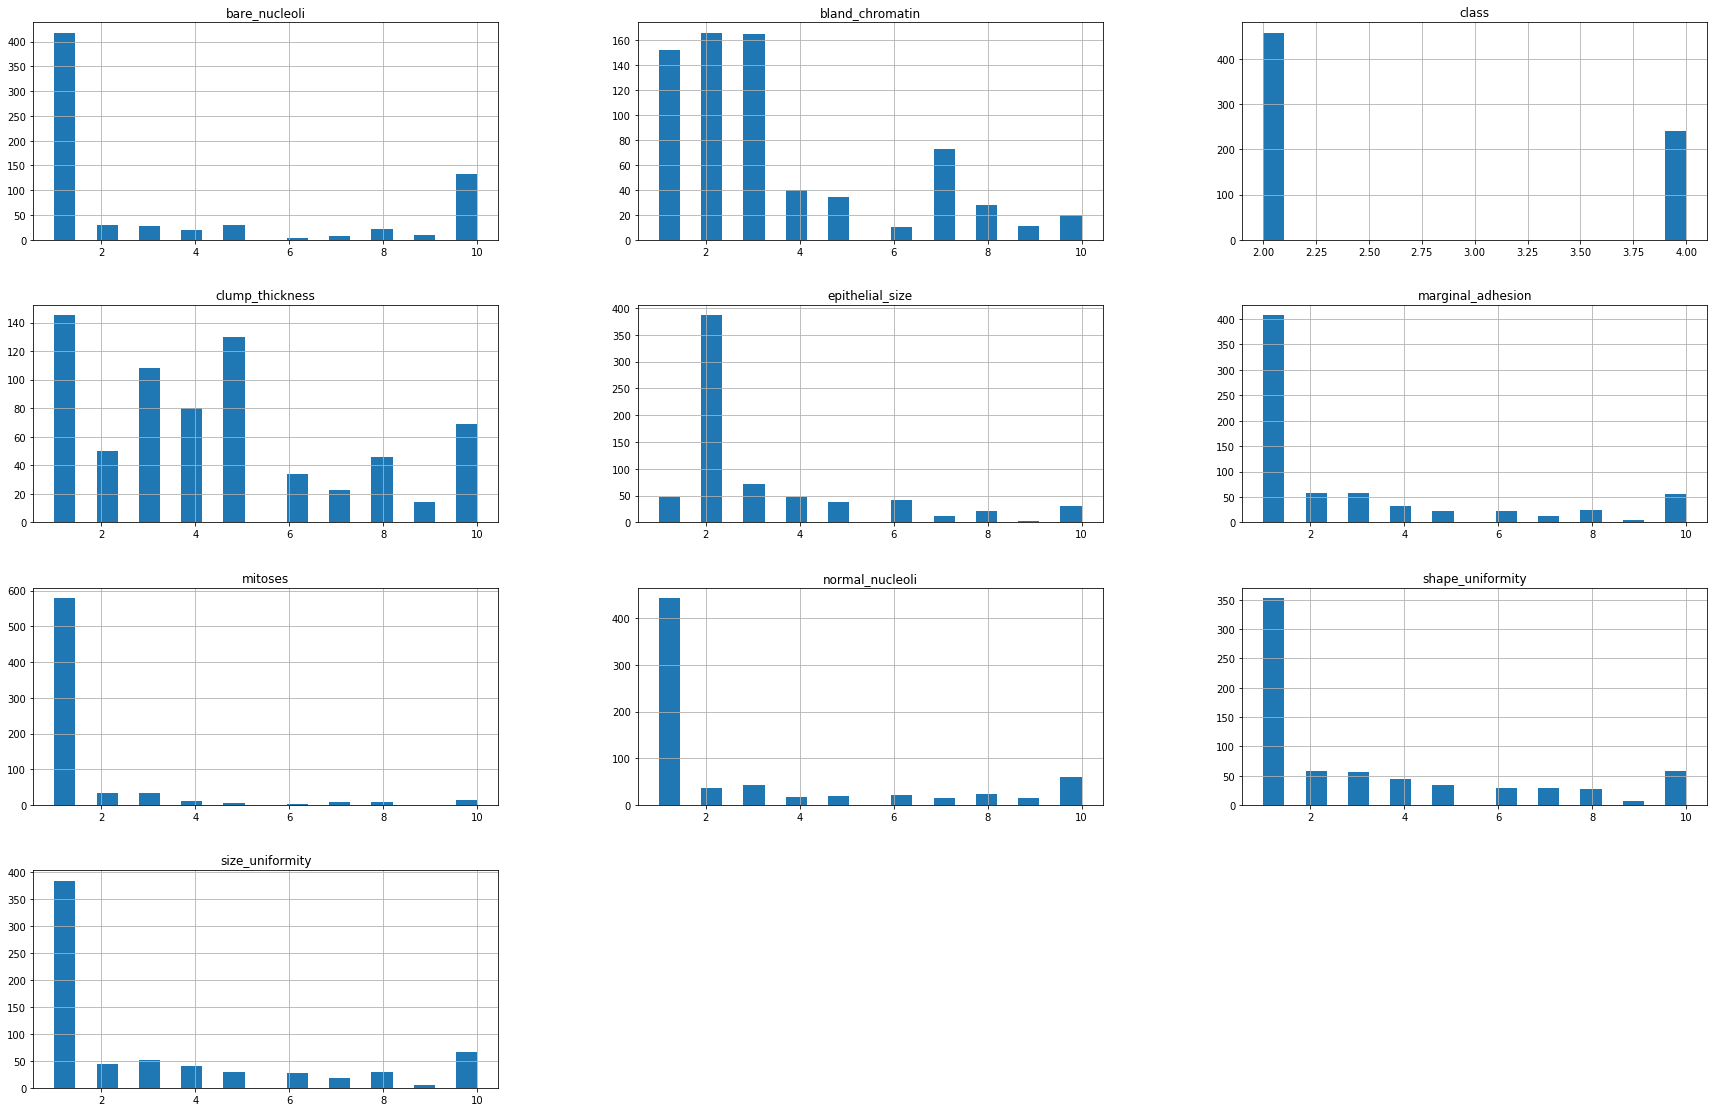

In [63]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

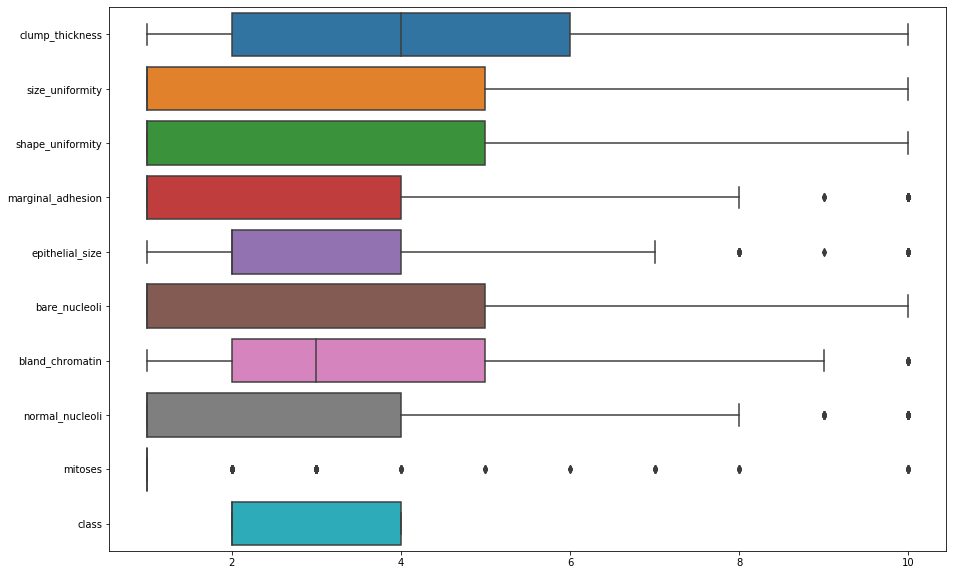

In [65]:
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h");

## There are outliers for few variable but these are ok for such data set
## This is not a large data set so we can leave the outliers as is

## Let's See the Correlation among these attributes

In [36]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


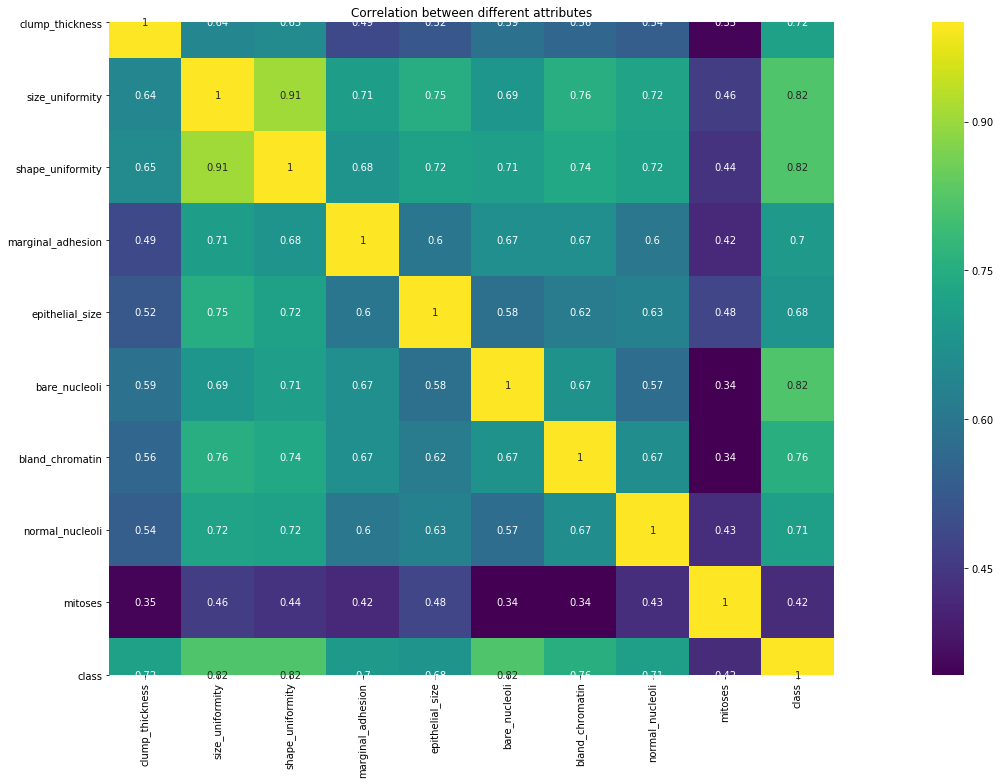

In [41]:
#Heatmap of the correlation between the indepent attributes

plt.figure(figsize=(35,12))
sns.heatmap(df.corr(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [ ]:
## From the above heatmap, the more the yellow or near to the yellow color mean positive corelation and the 
## blue means negative corelation

<IPython.core.display.Javascript object>

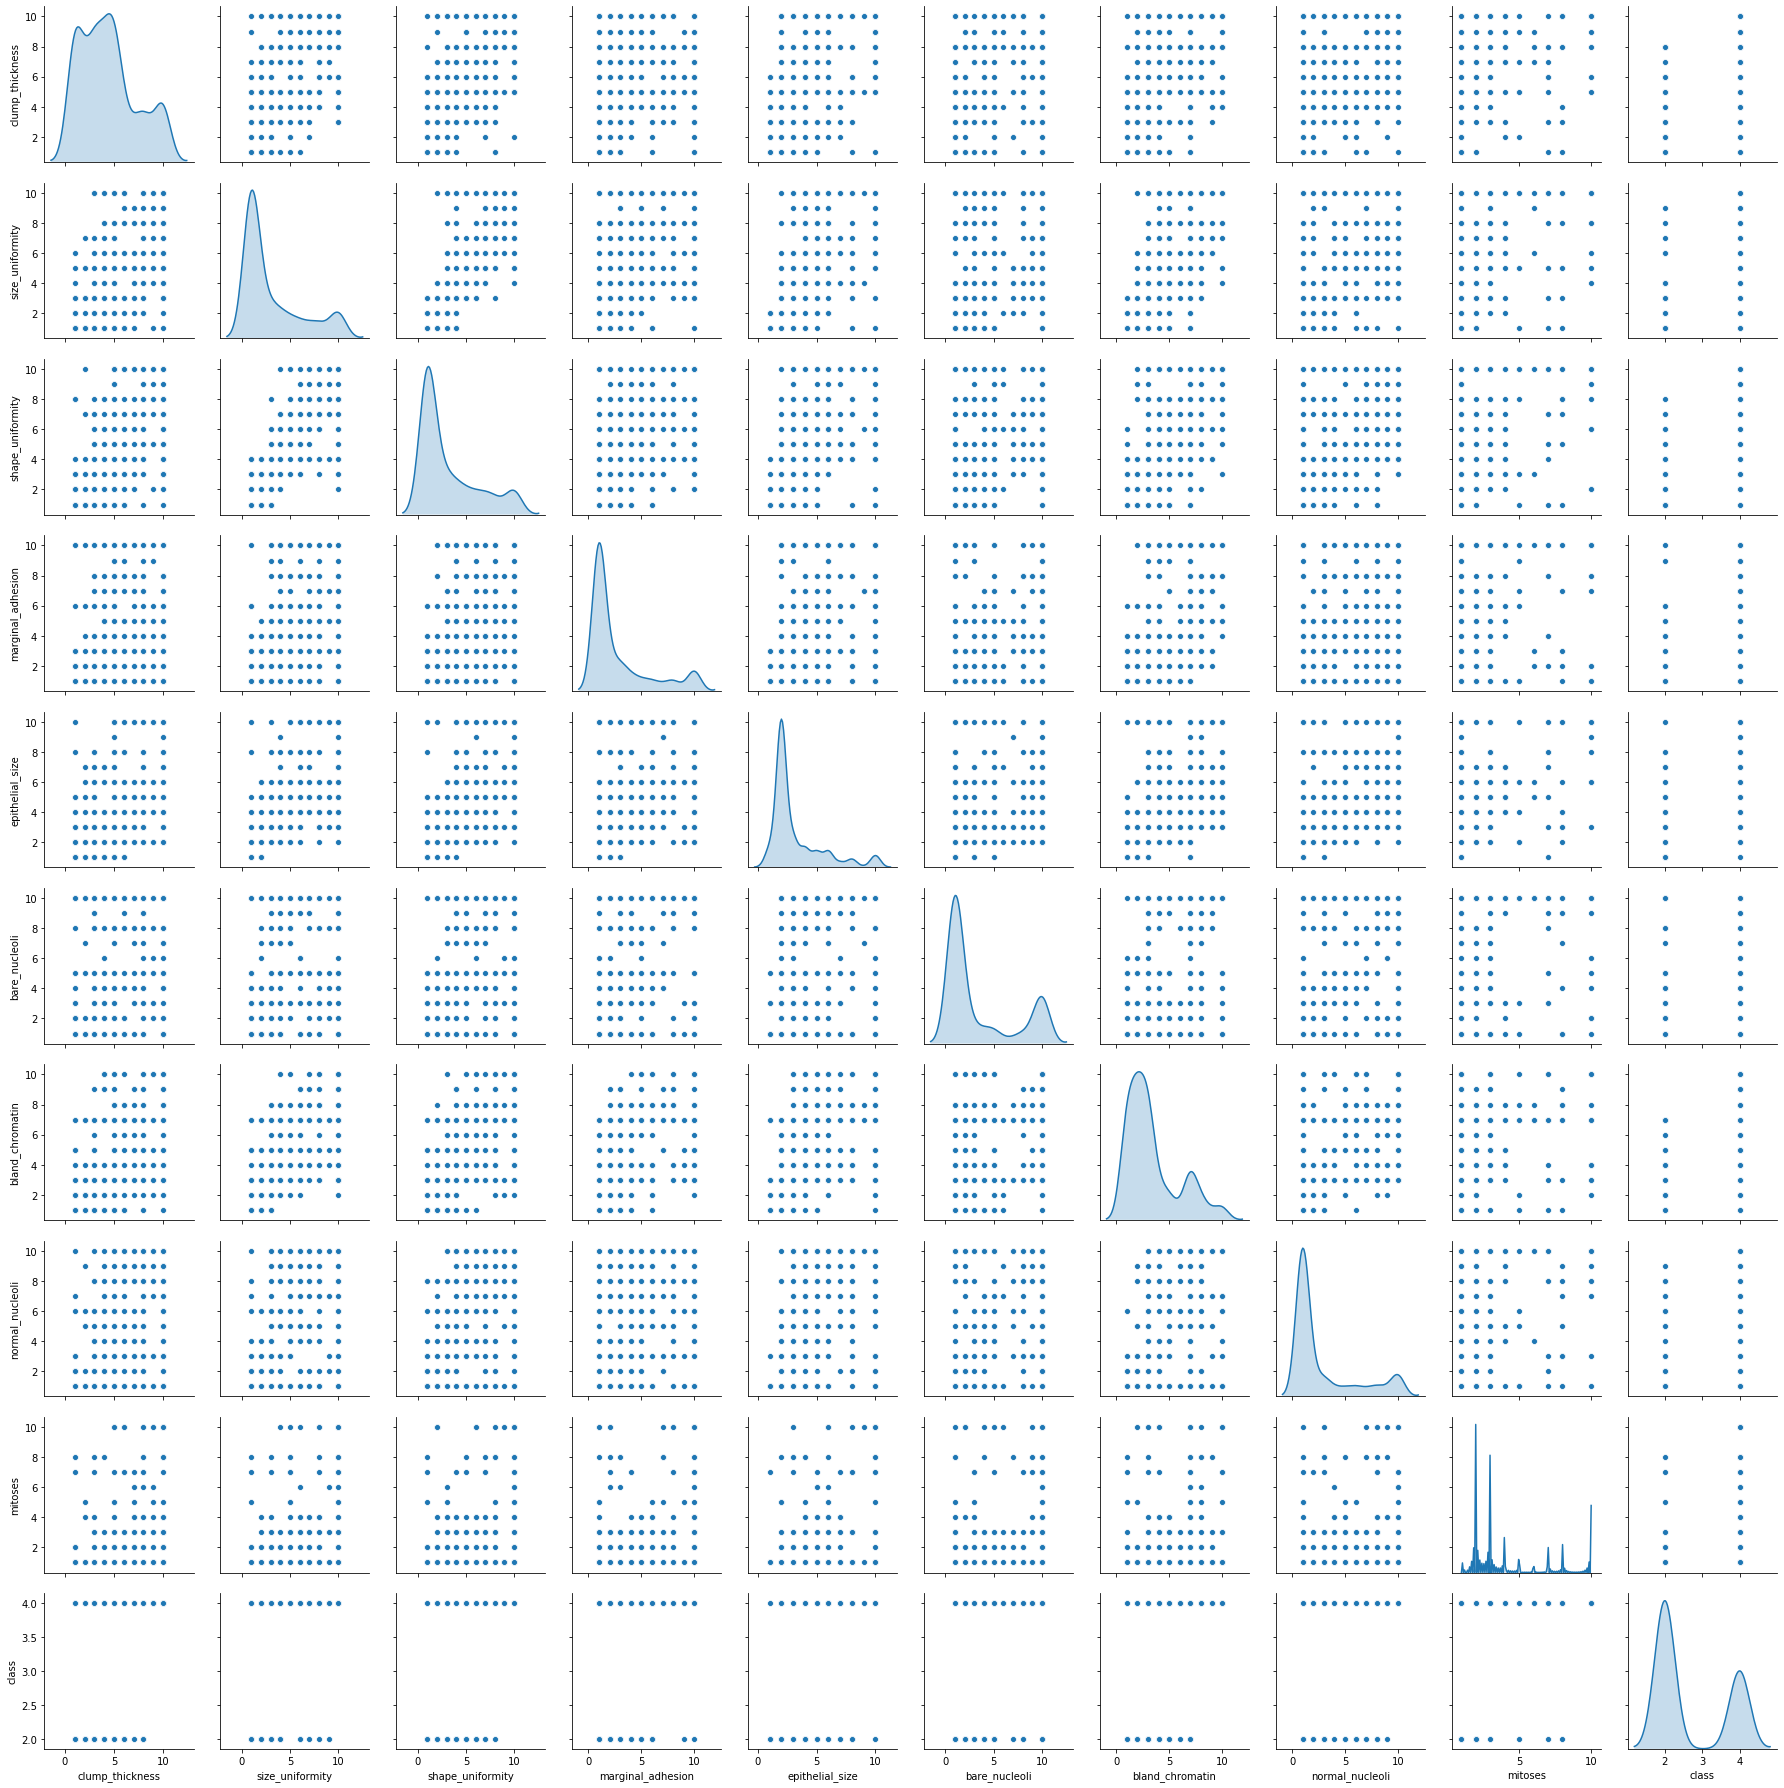

In [68]:
#Pairplot of the correlation/distribution between various independent attributes
sns.pairplot(df, diag_kind="kde")

## Building Our Model

In [42]:
# Dividing our dataset into training and testing set

X = df.drop('class', axis=1)  #selecting all the attributes except the class attribute
y = df['class'] #selecting class attribute. 

In [43]:
X

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [44]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int64

In [45]:
#Splitting our data into 70:30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [47]:
KNN

KNeighborsClassifier(weights='distance')

In [51]:
# Call Nearest Neighbour algorithm

KNN.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [52]:
predicted_1 = KNN.predict(X_test)
predicted_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [53]:
from scipy.stats import zscore

print('KNeighborsClassifier Agorithm is predicting at {0:.2g}%'.format(KNN.score(X_test, y_test)*100))

KNeighborsClassifier Agorithm is predicting at 97%


## Support Vector Machine

In [54]:
from sklearn.svm import SVC


svc= SVC(gamma=0.025, C=3)
svc.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [55]:
predicted_2 = svc.predict(X_test)
predicted_2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [56]:
print('SupportVectorClassifier Agorithm is predicting at {0:.2g}%'.format(svc.score(X_test, y_test)*100))

SupportVectorClassifier Agorithm is predicting at 98%


In [57]:
knnPredictions=pd.DataFrame(predicted_1)
svcPredictions=pd.DataFrame(predicted_2)

In [58]:
df1=pd.concat([knnPredictions,svcPredictions],axis=1)

In [59]:
df1.columns=[['knnPredictions','svcPredictions']]

In [55]:
df1

,knnPredictions,svcPredictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,2


In [61]:
from sklearn.metrics import classification_report

print("classification_report for KNN")

print("..."*10)

print(classification_report(y_test, predicted_1))

classification_report for KNN
..............................
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [62]:
from sklearn.metrics import classification_report

print("classification_report for SVC")

print("..."*10)

print(classification_report(y_test, predicted_2))

classification_report for SVC
..............................
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



Confusion Matrix For KNeighborsClassifier


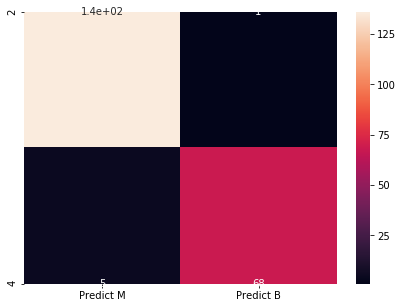

In [64]:
from sklearn import metrics

print("Confusion Matrix For KNeighborsClassifier")
cm=metrics.confusion_matrix(y_test, predicted_1, labels=[2, 4])

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## From KNN
### As we can see that for Benign it has wrongly classified as 1
### and for Malignant 5 are wrongly classified


Confusion Matrix For SupportVectorMachine


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

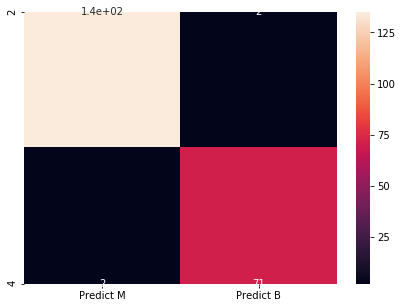

In [88]:
print("Confusion Matrix For SupportVectorMachine")
cm=metrics.confusion_matrix(y_test, predicted_2, labels=[2, 4])

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
## From SVM
### As we can see that for Benign it has wrongly classified as 2
### and for Malignant 2 are wrongly classified


## Conclusion from the Model Prediction:
* So Here we will go with Support Vector Machine Model and Recommend this to Dr Willian
* Next time if any new data will come so we will run that data on support vector machine model because it has 
* a accuracy of 98% whereas KNN has a accuracy of 97%.
